In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
import contextily as ctx
import geojson


In [3]:
df = pd.read_csv('datashine_QS701EW0010_OA.csv')

In [4]:
geo = gpd.read_file('/Users/admin/Jupyter/lchs_work/Maps/OA/england_oac_2011.shp')

In [5]:
geo.head()

,oac_sub_gr,oac_group_,oac_super_,oac_sub__1,oac_group,oac_supe_1,name,label,code,geometry
0,Student Communal Living,Students Around Campus,Cosmopolitans,2a1,2a,2,None,E06000044E02003547E01017131E00086546,E00086546,"POLYGON ((463839.333 99303.417, 463839.420 993..."
1,Hard-Pressed Ethnic Mix,Migration and Churn,Hard-Pressed Living,8d2,8d,8,None,E06000044E02003531E01017085E00086302,E00086302,"POLYGON ((466653.780 104315.447, 466655.147 10..."
2,Hard-Pressed Ethnic Mix,Migration and Churn,Hard-Pressed Living,8d2,8d,8,None,E06000044E02003530E01017091E00086303,E00086303,"POLYGON ((465615.000 103841.609, 465615.000 10..."
3,Hard-Pressed Ethnic Mix,Migration and Churn,Hard-Pressed Living,8d2,8d,8,None,E06000044E02003537E01017019E00085956,E00085956,"POLYGON ((466056.679 100998.928, 466056.646 10..."
4,Hard-Pressed Ethnic Mix,Migration and Churn,Hard-Pressed Living,8d2,8d,8,None,E06000044E02003525E01017053E00086113,E00086113,"POLYGON ((465056.606 106013.554, 465056.690 10..."


In [6]:
df.reset_index(inplace=True)
df.head()

,index,OA Code,Ward Name,LA Name,Region Name,QS701EW0010,QS701EW0001 (base),OA Percentage
0,E00116589,Hayling West,Havant,South East,5,224,2.23,NaN
1,E00116582,Hayling West,Havant,South East,3,229,1.31,NaN
2,E00116591,Hayling West,Havant,South East,6,206,2.91,NaN
3,E00116580,Hayling West,Havant,South East,4,176,2.27,NaN
4,E00116583,Hayling West,Havant,South East,9,218,4.13,NaN


In [7]:
merged = geo.merge(df, left_on='code', right_on='index', how='inner')

In [8]:
merged.head()

,oac_sub_gr,oac_group_,oac_super_,oac_sub__1,oac_group,oac_supe_1,name,label,code,geometry,index,OA Code,Ward Name,LA Name,Region Name,QS701EW0010,QS701EW0001 (base),OA Percentage
0,Student Communal Living,Students Around Campus,Cosmopolitans,2a1,2a,2,None,E06000044E02003547E01017131E00086546,E00086546,"POLYGON ((463839.333 99303.417, 463839.420 993...",E00086546,St Thomas,Portsmouth,South East,12,561,2.14,NaN
1,Hard-Pressed Ethnic Mix,Migration and Churn,Hard-Pressed Living,8d2,8d,8,None,E06000044E02003537E01017019E00085956,E00085956,"POLYGON ((466056.679 100998.928, 466056.646 10...",E00085956,Baffins,Portsmouth,South East,17,391,4.35,NaN
2,Challenged Transitionaries,White Communities,Constrained City Dwellers,7c1,7c,7,None,E06000044E02003540E01017093E00086327,E00086327,"POLYGON ((467377.627 99642.684, 467418.221 996...",E00086327,Milton,Portsmouth,South East,9,216,4.17,NaN
3,Deprived Blue-Collar Terraces,Challenged Terraced Workers,Hard-Pressed Living,8b1,8b,8,None,E06000044E02003540E01017096E00086324,E00086324,"POLYGON ((467243.421 99675.157, 467229.961 996...",E00086324,Milton,Portsmouth,South East,12,209,5.74,NaN
4,Deprived Blue-Collar Terraces,Challenged Terraced Workers,Hard-Pressed Living,8b1,8b,8,None,E06000044E02003540E01017096E00086325,E00086325,"POLYGON ((466847.510 99630.553, 466854.920 996...",E00086325,Milton,Portsmouth,South East,15,224,6.70,NaN


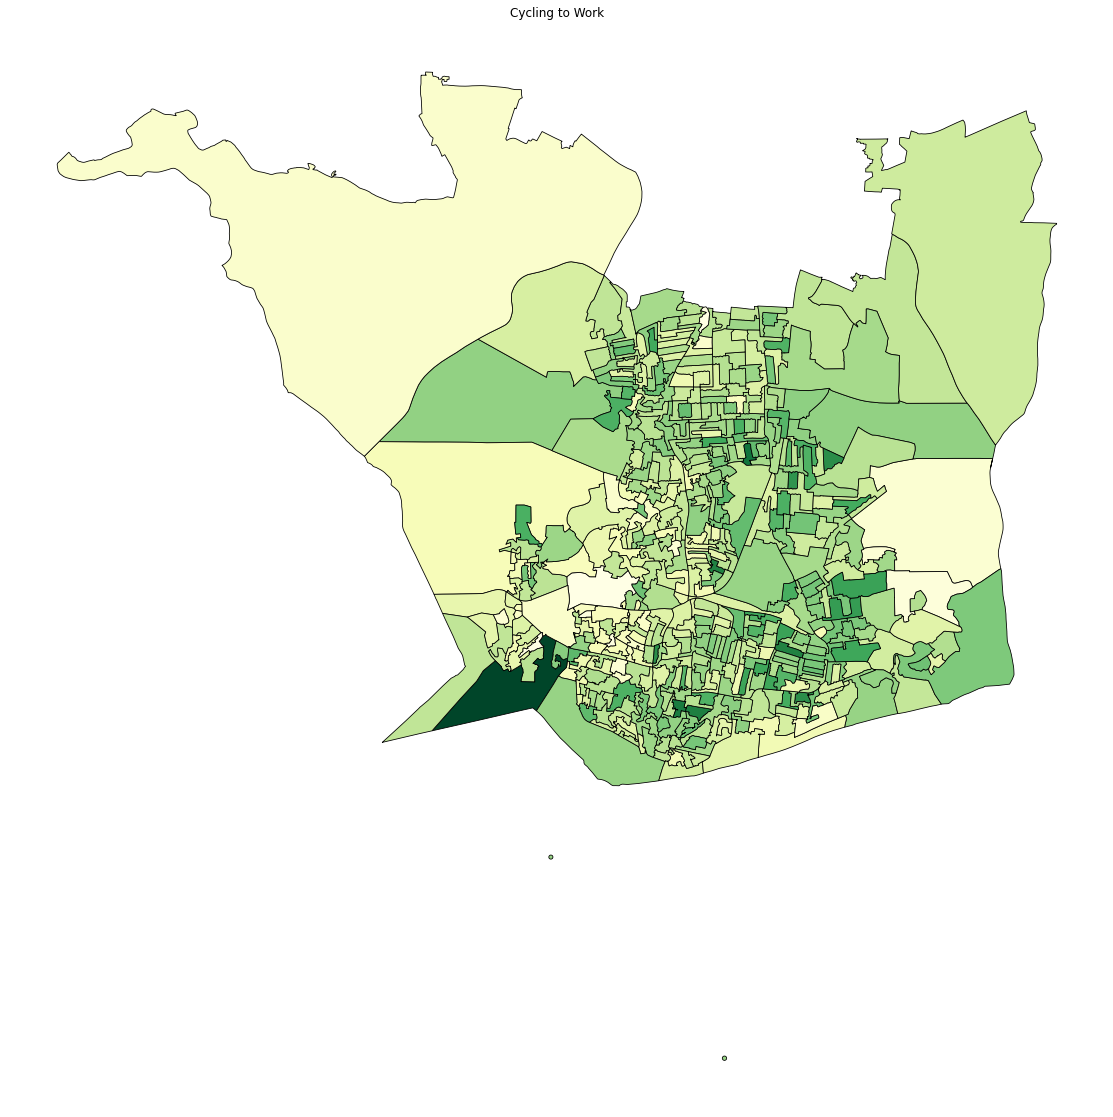

In [9]:
fig, ax = plt.subplots(1, figsize=(20,20))
ax.axis('off')
ax.set_title('Cycling to Work')

merged.plot(column='QS701EW0001 (base)', cmap='YlGn',
           linewidth=0.8, ax=ax, edgecolor='0')

plt.show()

fig.savefig('Cycling.png')

In [10]:
density = pd.read_csv('datashine_QS112EW0002_OA.csv')
density.reset_index(inplace=True)
density.head()

,index,OA Code,Ward Name,LA Name,Region Name,QS112EW0002,QS112EW0001 (base),OA Percentage
0,E00116541,Hayling East,Havant,South East,73,472,15.47,NaN
1,E00116641,St Faith's,Havant,South East,41,320,12.81,NaN
2,E00116589,Hayling West,Havant,South East,33,306,10.78,NaN
3,E00116582,Hayling West,Havant,South East,37,314,11.78,NaN
4,E00116591,Hayling West,Havant,South East,53,294,18.03,NaN


In [11]:
merged_density = geo.merge(density, right_on='index', left_on='code')

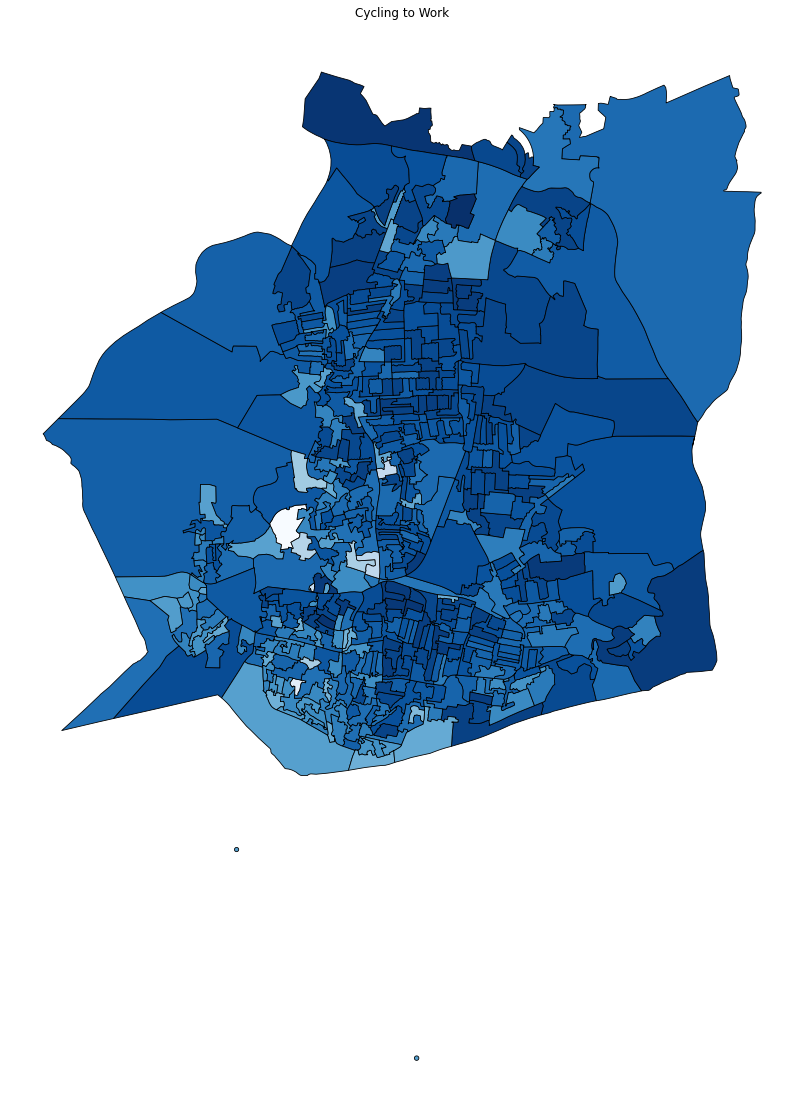

In [12]:
fig, ax = plt.subplots(1, figsize=(20,20))
ax.axis('off')
ax.set_title('Cycling to Work')

merged_density.plot(column='QS112EW0001 (base)', cmap='Blues_r',
           linewidth=0.8, ax=ax, edgecolor='0')

plt.show()

fig.savefig('density.png')

In [13]:
merged.columns

Index(['oac_sub_gr', 'oac_group_', 'oac_super_', 'oac_sub__1', 'oac_group',
       'oac_supe_1', 'name', 'label', 'code', 'geometry', 'index', 'OA Code',
       'Ward Name', 'LA Name', 'Region Name', 'QS701EW0010',
       'QS701EW0001 (base)', 'OA Percentage'],
      dtype='object')

In [14]:
merged = merged.to_crs(epsg=3857)


/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  if __name__ == '__main__':
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:268: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,


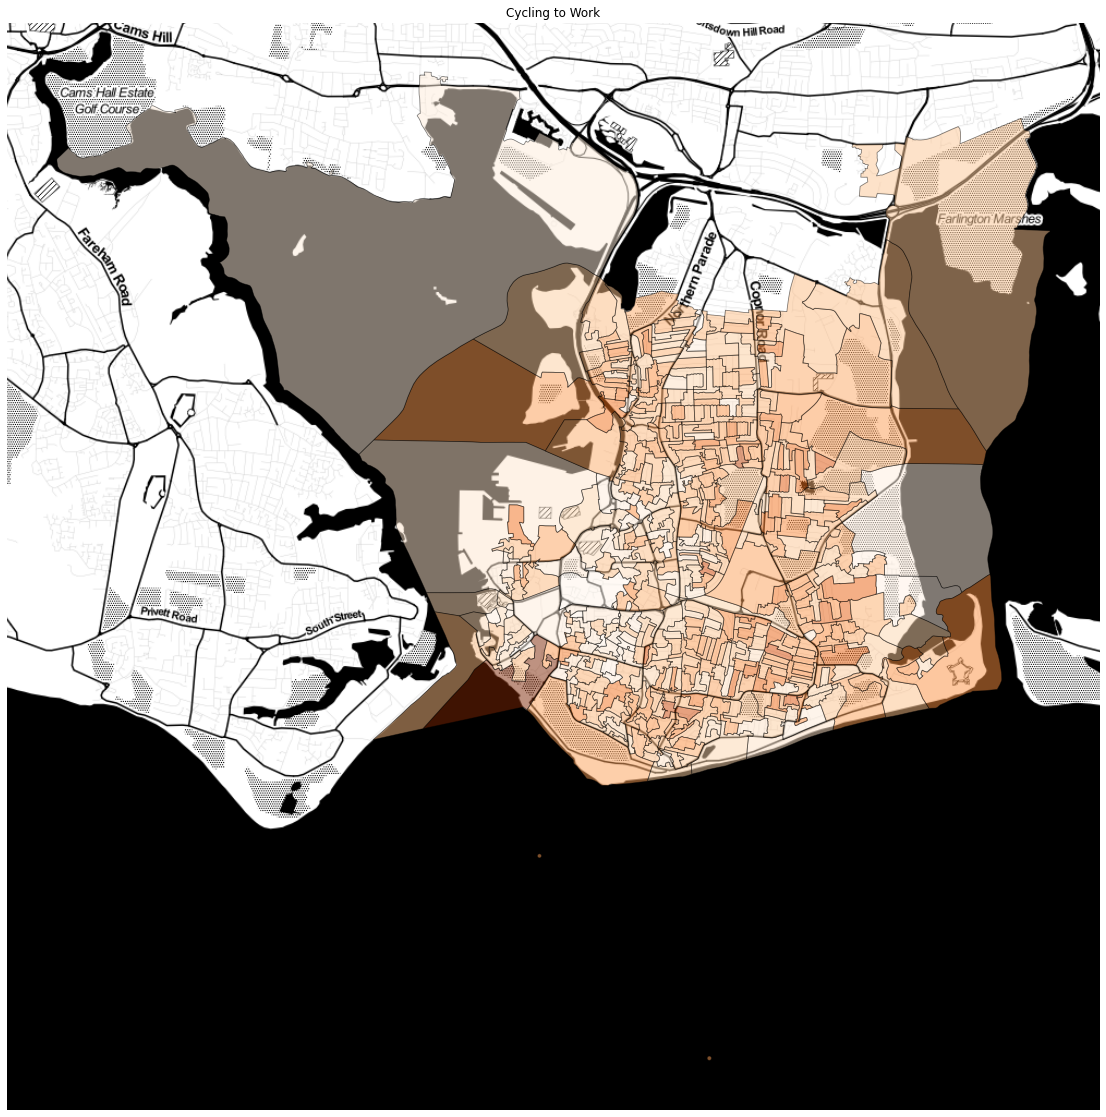

In [15]:
fig, ax = plt.subplots(1, figsize=(20,20))
ax.axis('off')
ax.set_title('Cycling to Work')

merged.plot(column='QS701EW0001 (base)', cmap='Oranges',
           linewidth=0.8, ax=ax, edgecolor='0', alpha=0.5)


ctx.add_basemap(ax,url='http://tile.stamen.com/toner/tileZ/tileX/tileY.png')

plt.show()

fig.savefig('Solent_TonerTile.png')



In [16]:
geo = gpd.read_file('/Users/admin/Jupyter/lchs_work/Maps/Wards/Wards_(December_2017)_Boundaries_in_the_UK_(WGS84).shp')

In [17]:
geo

,objectid,wd17cd,wd17nm,wd17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E05000026,Abbey,None,544434,184378,0.081291,51.539822,0.000163,0.095056,"MULTIPOLYGON (((0.08092 51.54438, 0.08206 51.5..."
1,2,E05000027,Alibon,None,549247,185196,0.150987,51.545921,0.000177,0.081044,"POLYGON ((0.15635 51.55102, 0.15642 51.54973, ..."
2,3,E05000028,Becontree,None,546863,185869,0.116912,51.552601,0.000167,0.075036,"POLYGON ((0.12713 51.55561, 0.12690 51.55526, ..."
3,4,E05000029,Chadwell Heath,None,548266,189340,0.138596,51.583420,0.000439,0.108753,"POLYGON ((0.14818 51.59896, 0.14811 51.59868, ..."
4,5,E05000030,Eastbrook,None,550774,186272,0.173453,51.555191,0.000447,0.106966,"POLYGON ((0.18512 51.56479, 0.18515 51.56475, ..."
...,...,...,...,...,...,...,...,...,...,...,...
9126,9127,W05001034,Seven Sisters,Blaendulais,282205,208034,-3.708120,51.758572,0.001516,0.190597,"POLYGON ((-3.71489 51.77822, -3.71488 51.77821..."
9127,9128,W05001035,Tai-bach,Tai-bach,278526,188941,-3.754750,51.586189,0.000718,0.156890,"POLYGON ((-3.73213 51.60008, -3.73213 51.59956..."
9128,9129,W05001036,Broughton South,Brychdyn - De,333635,362976,-2.994000,53.159771,0.000429,0.156155,"POLYGON ((-2.97093 53.16077, -2.97108 53.16050..."
9129,9130,W05001037,Penally,Penalun,211555,200954,-4.726920,51.675659,0.002761,0.378792,"MULTIPOLYGON (((-4.76166 51.70720, -4.76151 51..."


In [18]:
df = pd.read_csv('bulk.csv')
df.head()

,date,geography,geography code,Rural Urban,Method of Travel to Work: All categories: Method of travel to work; measures: Value,Method of Travel to Work: Work mainly at or from home; measures: Value,"Method of Travel to Work: Underground, metro, light rail, tram; measures: Value",Method of Travel to Work: Train; measures: Value,"Method of Travel to Work: Bus, minibus or coach; measures: Value",Method of Travel to Work: Taxi; measures: Value,"Method of Travel to Work: Motorcycle, scooter or moped; measures: Value",Method of Travel to Work: Driving a car or van; measures: Value,Method of Travel to Work: Passenger in a car or van; measures: Value,Method of Travel to Work: Bicycle; measures: Value,Method of Travel to Work: On foot; measures: Value,Method of Travel to Work: Other method of travel to work; measures: Value,Method of Travel to Work: Not in employment; measures: Value
0,2011,Bank Top,E05001553,Total,2953,75,0,50,150,23,2,882,161,46,408,16,1140
1,2011,Central,E05001554,Total,3123,63,0,49,185,14,3,803,130,51,484,8,1333
2,2011,Cockerton East,E05001555,Total,3930,79,1,31,193,26,9,1698,184,67,354,13,1275
3,2011,Cockerton West,E05001556,Total,2785,35,0,21,233,34,8,804,106,44,186,8,1306
4,2011,College,E05001557,Total,2970,141,4,74,52,7,6,1304,92,48,362,13,867


In [19]:
merged = df.merge(geo, left_on='geography code', right_on='wd17cd', how='inner')
merged

,date,geography,geography code,Rural Urban,Method of Travel to Work: All categories: Method of travel to work; measures: Value,Method of Travel to Work: Work mainly at or from home; measures: Value,"Method of Travel to Work: Underground, metro, light rail, tram; measures: Value",Method of Travel to Work: Train; measures: Value,"Method of Travel to Work: Bus, minibus or coach; measures: Value",Method of Travel to Work: Taxi; measures: Value,...,wd17cd,wd17nm,wd17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,2011,Brotton,E05001505,Total,5185,85,1,38,195,5,...,E05001505,Brotton,None,469376,520169,-0.92840,54.571999,0.001359,0.199228,"POLYGON ((-0.89817 54.57194, -0.89866 54.57134..."
1,2011,Coatham,E05001506,Total,4032,81,2,82,134,18,...,E05001506,Coatham,None,459773,525016,-1.07593,54.616772,0.000151,0.084406,"POLYGON ((-1.05958 54.61804, -1.05961 54.61802..."
2,2011,Dormanstown,E05001507,Total,4837,78,3,55,192,40,...,E05001507,Dormanstown,None,456527,523318,-1.12651,54.601891,0.004712,0.630147,"MULTIPOLYGON (((-1.13756 54.64580, -1.13779 54..."
3,2011,Eston,E05001508,Total,5213,56,1,40,268,27,...,E05001508,Eston,None,457129,519468,-1.11794,54.567230,0.000634,0.226788,"POLYGON ((-1.08357 54.57243, -1.08397 54.57239..."
4,2011,Grangetown,E05001509,Total,3496,24,1,11,208,55,...,E05001509,Grangetown,None,455100,520802,-1.14907,54.579441,0.000276,0.093547,"POLYGON ((-1.13547 54.56795, -1.13617 54.56773..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,2011,St. Julians,W05000848,Total,6374,79,1,107,362,41,...,W05000848,St. Julians,Sain Silian,332156,189442,-2.98092,51.599709,0.000253,0.091390,"POLYGON ((-2.96857 51.60478, -2.96869 51.60463..."
6091,2011,Shaftesbury,W05000849,Total,3796,62,2,54,252,17,...,W05000849,Shaftesbury,Shaftesbury,330760,189889,-3.00116,51.603561,0.000212,0.121422,"POLYGON ((-2.99160 51.60435, -2.99159 51.60435..."
6092,2011,Stow Hill,W05000850,Total,3689,89,3,103,244,17,...,W05000850,Stow Hill,Stow Hill,331023,187634,-2.99692,51.583321,0.000170,0.069074,"POLYGON ((-2.98528 51.58373, -2.98556 51.58359..."
6093,2011,Tredegar Park,W05000851,Total,3040,31,2,26,180,8,...,W05000851,Tredegar Park,Parc Tredegar,329464,185195,-3.01893,51.561199,0.000233,0.077791,"POLYGON ((-3.00670 51.56653, -3.00659 51.56591..."
